# Clean hashtags column to make wordcloud

In [39]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [21]:
# load data
hashtags_df = pd.read_csv('resources/dataset/hashtags.csv')
hashtags_df.head()

,hashtags
0,"[{'text': 'Russian', 'indices': [45, 53]}, {'t..."
1,"[{'text': 'China', 'indices': [18, 24]}, {'tex..."
2,"[{'text': 'Ukraine', 'indices': [87, 95]}]"
3,"[{'text': 'hodl', 'indices': [23, 28]}, {'text..."
4,"[{'text': 'Ukraine', 'indices': [19, 27]}]"


In [22]:
# diagnose: column set as string
type(hashtags_df.hashtags.iloc[0])

str

In [23]:
# create new column that converts hashtags column into list
hashtags_df['hashtags_list'] = hashtags_df.hashtags.apply(lambda x: x.strip('[]').split(','))
hashtags_df

,hashtags,hashtags_list
0,"[{'text': 'Russian', 'indices': [45, 53]}, {'t...","[{'text': 'Russian', 'indices': [45, 53]}, ..."
1,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'text': 'China', 'indices': [18, 24]}, {'..."
2,"[{'text': 'Ukraine', 'indices': [87, 95]}]","[{'text': 'Ukraine', 'indices': [87, 95]}]"
3,"[{'text': 'hodl', 'indices': [23, 28]}, {'text...","[{'text': 'hodl', 'indices': [23, 28]}, {'t..."
4,"[{'text': 'Ukraine', 'indices': [19, 27]}]","[{'text': 'Ukraine', 'indices': [19, 27]}]"
...,...,...
5157761,"[{'text': 'Putin', 'indices': [43, 49]}]","[{'text': 'Putin', 'indices': [43, 49]}]"
5157762,"[{'text': 'Donbass', 'indices': [106, 114]}]","[{'text': 'Donbass', 'indices': [106, 114]}]"
5157763,"[{'text': 'Ukraine', 'indices': [15, 23]}, {'t...","[{'text': 'Ukraine', 'indices': [15, 23]}, ..."
5157764,"[{'text': 'RussiaUkraineWar', 'indices': [254,...","[{'text': 'RussiaUkraineWar', 'indices': [254..."


In [24]:
# check if issue is resolved
type(hashtags_df.hashtags_list.iloc[0])

list

In [29]:
# create new dataframe that split column using commas
out = pd.DataFrame(hashtags_df['hashtags_list'].explode().tolist(), columns=['tags'])
out

,tags
0,{'text': 'Russian'
1,'indices': [45
2,53]}
3,{'text': 'Obukhiv'
4,'indices': [82
...,...
39363985,'indices': [272
39363986,279]}
39363987,{'text': 'Putin'
39363988,'indices': [24


In [30]:
# get all the rows that contain 'text' string
out = out[out['tags'].str.contains('text', case=False, na = False)]
out

,tags
0,{'text': 'Russian'
3,{'text': 'Obukhiv'
6,{'text': 'Kyiv'
9,{'text': 'China'
12,{'text': 'Ukraine'
...,...
39363975,{'text': 'Ukraine'
39363978,{'text': 'Sumy'
39363981,{'text': 'RussiaUkraineWar'
39363984,{'text': 'israel'


In [31]:
# clean hashtag by extracting what come before it
out['tags'] = out['tags'].str.replace("{'text': '", "")
out

/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tags
0,Russian'
3,Obukhiv'
6,Kyiv'
9,China'
12,Ukraine'
...,...
39363975,Ukraine'
39363978,Sumy'
39363981,RussiaUkraineWar'
39363984,israel'


In [32]:
# clean hashtag by extracting what comes after it
out['tags'] = out['tags'].str.replace("'", "")
out

/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tags
0,Russian
3,Obukhiv
6,Kyiv
9,China
12,Ukraine
...,...
39363975,Ukraine
39363978,Sumy
39363981,RussiaUkraineWar
39363984,israel


In [34]:
out = out['tags']
out

0                    Russian
3                    Obukhiv
6                       Kyiv
9                      China
12                   Ukraine
                  ...       
39363975             Ukraine
39363978                Sumy
39363981    RussiaUkraineWar
39363984              israel
39363987               Putin
Name: tags, Length: 13121330, dtype: object

# Create wordcloud with hashtags

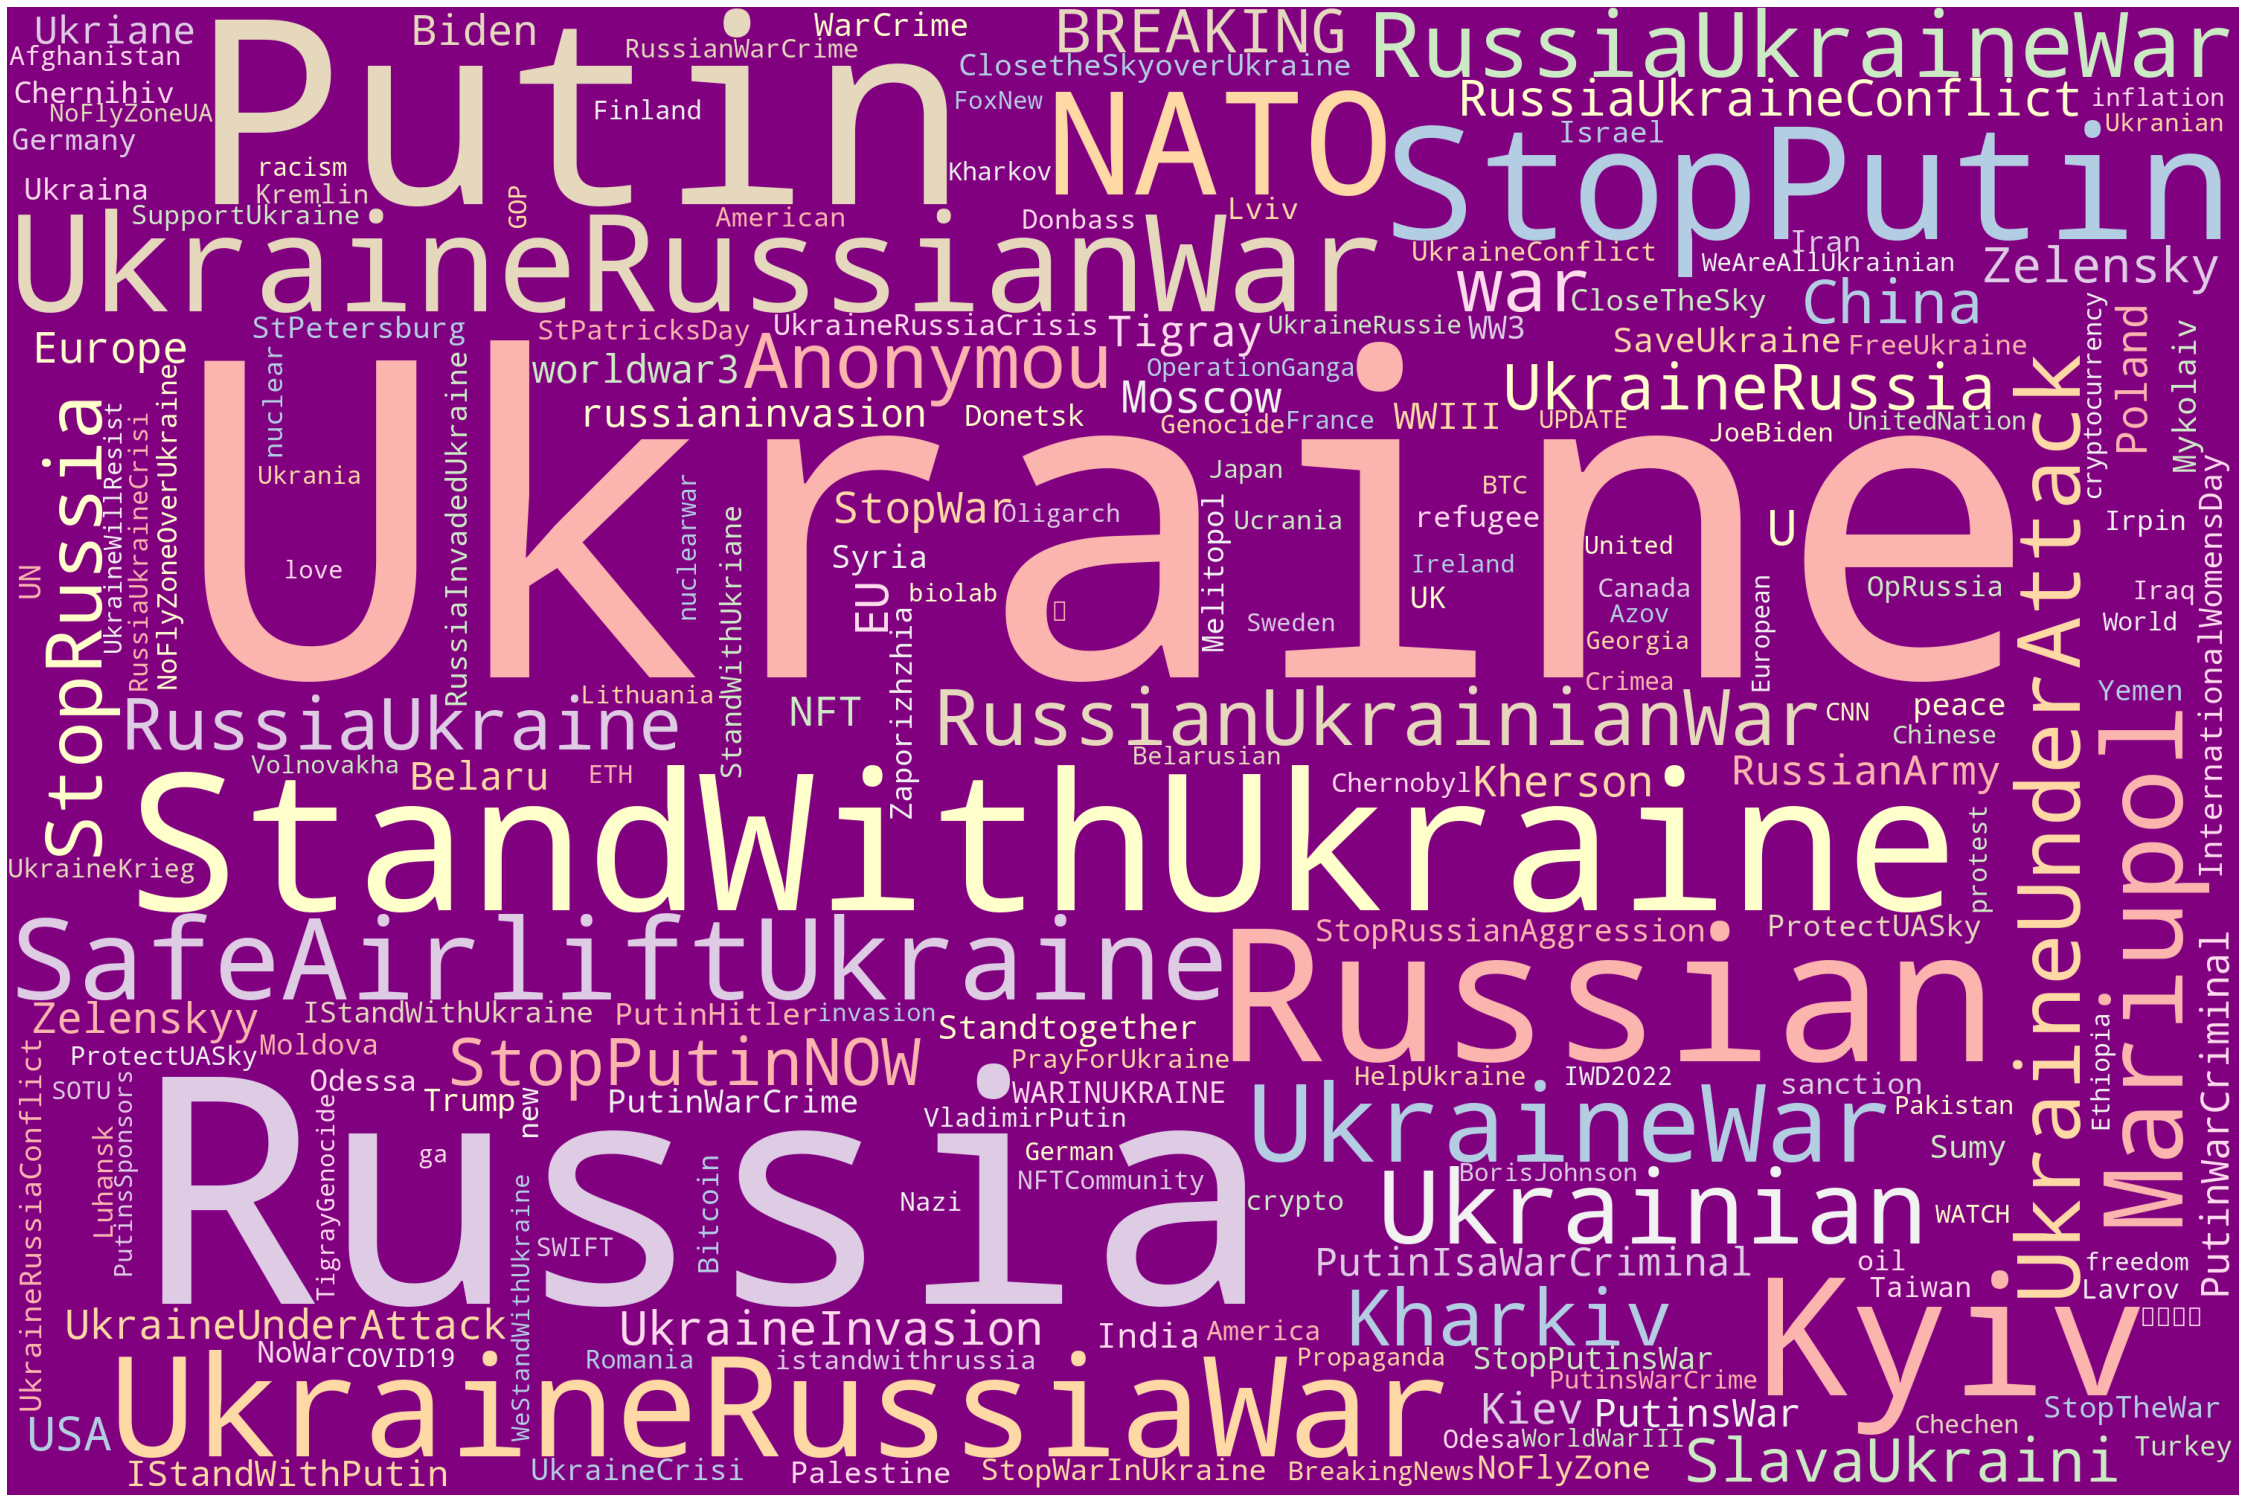

In [40]:
# make wordcloud of hashtags
hashtags = ' '.join([tags for tags in out])
wordcloud = WordCloud(width= 3000, height = 2000, background_color="purple", colormap='Pastel1', random_state=1, collocations=False).generate(hashtags)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
# get list of most frequent hashtags
word_count = Counter(hashtags.split()).most_common()
word_count

[('Ukraine', 2322081),
 ('Russia', 1031921),
 ('Putin', 638992),
 ('StandWithUkraine', 272828),
 ('Russian', 268866),
 ('StopPutin', 216173),
 ('Kyiv', 208929),
 ('UkraineRussiaWar', 173206),
 ('UkraineRussianWar', 171606),
 ('NATO', 170829),
 ('SafeAirliftUkraine', 162572),
 ('Mariupol', 149428),
 ('UkraineWar', 139609),
 ('RussiaUkraineWar', 123418),
 ('UkraineUnderAttack', 119816),
 ('Ukrainian', 111587),
 ('ukraine', 107752),
 ('RussianUkrainianWar', 93977),
 ('Kharkiv', 91577),
 ('Anonymous', 89611),
 ('StopRussia', 87029),
 ('RussiaUkraine', 77901),
 ('Ukraine️', 71820),
 ('war', 65381),
 ('StopPutinNOW', 61202),
 ('russia', 59732),
 ('UkraineRussia', 58144),
 ('RussiaUkraineConflict', 51139),
 ('US', 50204),
 ('China', 49775),
 ('SlavaUkraini', 49109),
 ('Zelensky', 48957),
 ('UkraineInvasion', 45104),
 ('putin', 44819),
 ('EU', 43600),
 ('USA', 41001),
 ('StandWithUkraine️', 40876),
 ('BREAKING', 39678),
 ('UKRAINE', 38963),
 ('Moscow', 38725),
 ('Kherson', 38586),
 ('Tigray', 